In [25]:
#Name: Yeju Kim
#Student number: 110672346
#Class: CSCI1200 - 010
#Homework name: Extra_Credits_Yeju_Kim_CSCI1200
#Description: 
    #Four graphs for extra credits.

# Bring and run the code for drawing the plot.

I brought the code from 'Checkpoint3_Yeju_Kim_CSCI1200.ipynb' file.
 1. Import the libraries needed.
 2. Bring the helper functions.
 3. Read, clean, save the data.
 4. Define the four utility functions.
 5. Define 'get_menu_choice()' and 'main()' function.

In [26]:
##1.

# Import all libraries needed for the project.

import csv
import pandas as pd
import random
import math


In [27]:
##2.

%matplotlib inline


import matplotlib.pyplot as plt
import statistics

# You may add more imports as needed

# "BD" stands for "batting data" 
class BD:
    year = 0
    player_id = 1
    first_name = 2
    last_name = 3
    team_name = 4
    games = 5
    at_bats = 6
    runs = 7
    hits = 8
    doubles = 9
    triples = 10
    home_runs = 11
    rbi = 12
    walks = 13
    hbp = 14
    stolen_bases = 15
    caught_stealing = 16
    strike_outs = 17
    sac_flies = 18
    position = 19

In [28]:
def verify_baseball_data(data):
    """
    Verifies the structure and format of the baseball data:
        checks that all rows have the same number of columns
        checks that each column is the correct type (str for string columns, int for int columns)
        checks that it has the correct number of rows and the correct number of columns
    
    If your data is in the right format, you'll see the output:
        Rows: 74750
        Cols: 20
        Congrats! You have the correct shape of data!

    If you see something else, this will give you an indication of what is not right.

    Parameters:
    -----------
        data : list of lists
            From the baseball data (each sublist corresponds to a row from the input file)
    """
    rows = len(data)
    cols = len(data[0])

    # make sure all rows have the same number of columns
    same_number_columns = True
    i = 0
    while i < len(data):
        row = data[i]
        if len(row) != cols:
            same_number_columns = False
        i += 1

    if not same_number_columns:
        print("Some rows have a different number of columns!")

    # make sure each column is the correct type
    overall_type = True    
    str_cols = [BD.player_id, BD.first_name, BD.last_name, BD.team_name, BD.position]
    
    column = 0
    while column < cols:
        col_vals = get_column_values(data, column)
        correct_type = True
        j = 0
        while j < len(col_vals):
            val = col_vals[j]
            if ((column in str_cols) and type(val) is not str) or (column not in str_cols and type(val) is not int):
                correct_type = False
            j += 1

        if not correct_type:
            print("Column " + str(column) + " contains values that are not the right type!")
            print(col_vals[:10]) # print the first 10 values
            overall_type = False
        column += 1


    if overall_type and same_number_columns:
        print("Rows: " + str(rows))
        print("Cols: " + str(cols))

        if rows == 74750 and cols == 20:
            print("Congrats! You have the correct shape of data!")
        else:
            print("You have the incorrect shape of data!")
            print("You have # rows (should be 74750): " + str(rows))
            print("You have # columns (should be 20): " + str(cols))

In [29]:
##3.
#Read, clean, save the data.


#Define the code ‘read_data()’
def read_data():
    #Store the “battingData1950Present.csv” to a variable called ‘filename'.
    filename = "battingData1950Present.csv"
    
    #Open the file and set up a CSV reader
    file = open(filename, "r")
    reader = csv.reader(file)
    
    #The file has a header, so indicate the first line as the header 
    #and get the new_data except for the header.
    line_count = 0
    new_data = []
    header = []
    for line in reader:
        if line_count == 0:
            header = line
        else:
            new_data.append(line)
        line_count += 1
    
    #Close the file not to be changed.
    file.close()
    
    #Retern the header and data.
    return new_data, header




#Define the 'clean_data()' function.
#This code is for modifying the data into analyzable form.

def clean_data(new_data):
    cleaned_data = []
    
    #Convert every element into the proper type of value 
    #using nested lists and store it in ‘clean_data.’
    for row in new_data:
        line = []
        for i in row:
            if i.isnumeric():
                line.append(int(i))
            elif i == "":
                line.append(0)
            elif type(i) == str:
                line.append(i)
        #After converting a single row, append the ‘line’ in the list ‘clean_data’.
        cleaned_data.append(line)
        
    return cleaned_data

data = clean_data(read_data()[0])


In [30]:
## 4.
# Utility function.

#a. 
#data is given in list of lists.
def get_matching_rows(data, column_index, target):
    matching_rows = []
    
    #For every line in data, if the element is the same as the target,
    #add it to ‘matching_rows.’
    #BD.column would be returning an index number by helper function
    for line in data:
        if line[column_index] == target:
            matching_rows.append(line)
            
    return matching_rows

#b. 
def get_column_values(data, column_index):
    column_value = []
    
    #For every line in clean data, add all elements whose index is the same as the columns.
    #column would be an index number.
    for line in data:
        column_value.append(line[column_index])
        
    return column_value

#c.
def get_unique_values(List):
    #Change the list into a set to take unique values and return it to a list.
    return list(set(List))

#d.
def get_unique_column_values(data, column):
    #Call the ‘get_column_values()’ and ‘get_unique_values()’ functions.
    values = get_column_values(data, column)
    unique = get_unique_values(values)
    
    return unique

In [31]:
##5.

#Make `get_menu_choice()` function to get user's input.
def get_menu_choice():
    #Define and prompt the menu for a user.
    menu = """
    1: Line graph of games played for one player over time
    2: Line graph of games played for one player over time, separated by team 
    3: Histogram of runs scored for all players in one year (no cutoff) 
    4: Histogram of runs scored for all players in one year (cutoff = 100) 
    5: Graph of team presence over time 
    6: Homeruns over time (percentiles)
    7: Violin boxplot for the number of home runs, hits, walks, and strike-out of a selected team. ( 1950 - 2016)
    8: multi-bar plots which shows the top 3 features among hits, doubles, triples, home runs, walks, stolen bases, sac fly, and caught stealing for every position, respectively.
    0: Exit"""
    
    choice = input(menu)
    
    #Define the valid input.
    valid_value = ["0", "1", "2", "3", "4", "5", "6", "7", "8"]
    
    #While the choice is not in the Valid_value, 
    #re-prompt the menu and ask again to the user.
    while not choice in valid_value:
        print("Error: Invalid value")
        choice = input(menu)
        
    #If not, return the choice
    return choice



#Define the main() function.
def main():
    #Get the cleaned data.
    data = clean_data(read_data()[0])
    
    #Check whether the data has been cleaned correctly.
    verify_baseball_data(data)
    
    #Call the get_menu_choice() function 
    #and store the choice(= user’s input) in menu_choice.
    menu_choice = get_menu_choice()
    
    # While munu_choice is not 0, implement the selected option.
    while menu_choice != '0':
        if menu_choice == '1':
            #Draw the Line graph of games played for one player over time
            print("Result: the Line graph of games played for one player over time")
            graph_1()
        elif menu_choice == '2':
            #Draw the Line graph of games played for one player over time, separated by team
            print("Result: the Line graph of games played for one player over time, separated by team")
            graph_2()
        elif menu_choice == '3':
            #Draw the Histogram of runs scored for all players in one year (no cutoff)
            print("Result: the Histogram of runs scored for all players in one year (no cutoff)")
            graph_3()
        elif menu_choice == '4':
            #Draw the Histogram of runs scored for all players in one year (cutoff = 100)
            print("Result: the Histogram of runs scored for all players in one year (cutoff = 100)")
            graph_4()
        elif menu_choice == '5':
            #Draw the graph of team presence over time
            print("Result: the graph of team presence over time")
            graph_5()
        elif menu_choice == '6':
            #Draw the plot of home runs over time (percentiles)
            print("Result: the plot of home runs over time (percentiles)")
            graph_6()
        elif menu_choice == '7':
            #Draw the violin boxplot for the number of 
            #home runs, hits, walks, and strike-out of a selected team. (1950 - 2016)
            print("Result: the violin boxplot for the number of home runs, hits, walks, and strike-out of a selected team. (1950 - 2016)")
            graph_7()
        elif menu_choice == '8':
            #Draw the multi-bar plots that show the top 3 features 
            #among hits, doubles, triples, home runs, walks, stolen bases, sac fly, and caught stealing 
            #for every position, respectively.
            print("Result: the multi-bar plots that show the top 3 features among hits, doubles, triples, \home runs, walks, stolen bases, sac fly, and caught stealing for every position, respectively.")
            graph_8()
            
            
        # If the previous process is completed, 
        #re-prompt the menu and ask for the user’s input again
        menu_choice = get_menu_choice()
    
    #Getting out of the while loop above means the user enters ‘0’, 
    #so return “Exit.”
    return "Exit"

# Extra credits

1. Plots for extra credits\
    a. A time plot of when teams were active\
    b. Plot homeruns over time (percentiles)
    
2. My own plots\
    a. Violin boxplot for the number of home runs, hits, walks, and strike-out of a selected team. (Cumulative 1950 - 2016)\
    b. the multiplot with bar plots that show the top 3 features among hits, doubles, triples, home runs, walks, stolen bases, sac fly, and caught stealing for every position, respectively.

In [32]:
## 1a.

#Define the function for plotting option 5.
def graph_5():
    
    #Create a dataframe which has two columns, 'team' and 'year', using pandas.
    #The columns take the values of every rows in the data.
    df = pd.DataFrame({"team": [row[BD.team_name] for row in data],
                       "year": [row[BD.year] for row in data]})
    
    #Sort the rows of dataframe by team using 'groupby'.
    groups = df.groupby("team")
    
    #Make the scatter plot by teams, which has 'year' for x-axis and 'team' for y-axis.
    #Arrange the shape and color of markers.
    for team, group in groups:
        plt.scatter(group.year, group.team, s = 13, marker = "s", edgecolors = "w", linewidths = .2)
    
    #Arrange the fontsize of yticks and set title and xlabel.
    plt.yticks(fontsize=5)
    plt.title("Team presence by year", fontweight = "bold")
    plt.xlabel("Year")
    
    #Save the plot as PDF file.
    plt.savefig("Graph_5.pdf", dpi = 150, format = "pdf")
    
    plt.show()
    
    #Return the plot.
    return

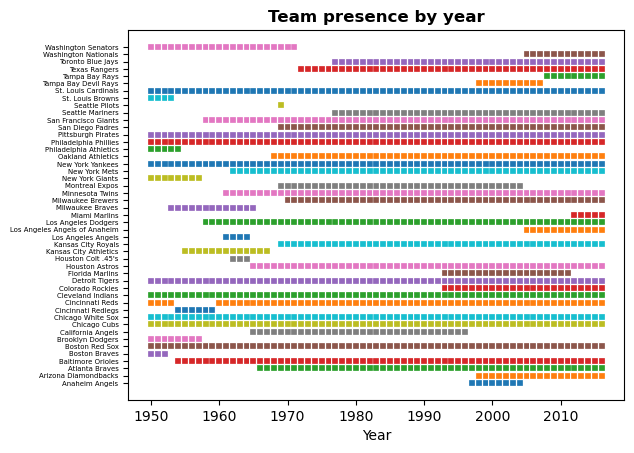

In [33]:
## Run the code.
graph_5()

In [34]:
## 1b.

#Define the function for plotting option 6.
def graph_6():
    #Create empty lists to save the number of max, 99th percentile, and 50th percentile homeruns for every year.
    year, Max, per99, per50 = get_unique_column_values(data, BD.year), [], [], []
    
    #Sort the data by year and append all values of homeruns into 'HR'.
    #Using HR, calculate  and append the elements into each Max, per99, and per50.
    for i in year:
        interest = get_matching_rows(data, BD.year, i)
        HR = [row[BD.home_runs] for row in interest]
        Max.append(max(HR))
        per99.append(sorted(HR)[int(len(HR) * 0.99)])
        per50.append(sorted(HR)[int(len(HR)/2)])
    
    #Make three line graphs and label them in one plot for Max, per99, per50, respectivly.
    #Set the legned, title, x and y-labels.
    plt.plot(year, Max, label = "Maximum")
    plt.plot(year, per99, label = "99th percentile")
    plt.plot(year, per50, label = "50th percentile")
    plt.legend()
    plt.title("Homeruns per year by player", fontweight = "bold")
    plt.xlabel("Year")
    plt.ylabel("Number of homeruns")
    
    #Save the plot as PDF file.
    plt.savefig("Graph_6.pdf", dpi = 150, format = "pdf")
    
    plt.show()
    
    #Return the plot.
    return


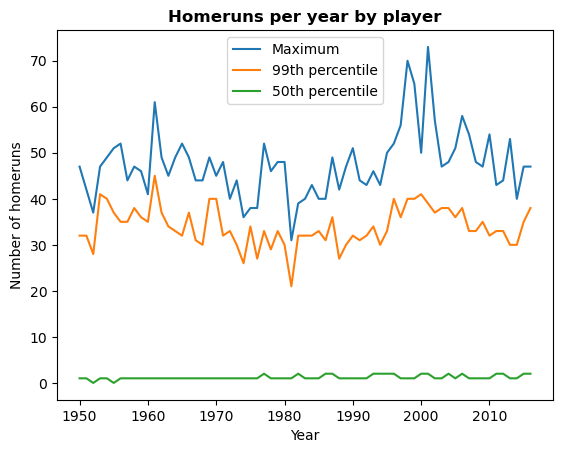

In [35]:
## Run the code.
graph_6()

In [36]:
## 2a.

#Define a function to sort the rows for a selected team.
def rows_for_team():
    
    #Make two options whether the user write the input directly or make a random input.
    ask = "If you want to enter the team name directly, enter '1', or want to choose randomly, enter '2':"
    choice = int(input(ask))
    
    #According the user's choice, store the selected team name in the variable, "team".
    if choice == 1:
        team = input("Enter a team name:")
    elif choice == 2:
        team_list = get_unique_column_values(data, BD.team_name)
        team = random.choice(team_list)
    else:
        print("Error: Invalid value")
        choice = int(input(ask))
    
    #Select the matcing rows using 'get_matching_rows()' function and return it.
    matched_rows = get_matching_rows(data, BD.team_name, team)
    
    return team, matched_rows
    

In [37]:
#Define the function for plotting option 7.
#Violin boxplot for the number of home runs, hits, walks, and strike-out of a selected team. (1950 - 2016) 
def graph_7():
    #Call the selected team and the matching rows using 'rows_for_team()' function.
    team, interest = rows_for_team()
    
    #Create dataframe containing 'homeruns', 'hits', 'walks', and 'strike_outs' as columns using pandas and for loops
    df = pd.DataFrame({"Homeruns": [row[BD.home_runs] for row in interest],
                       "Hits": [row[BD.hits] for row in interest],
                      "Walks":[row[BD.walks] for row in interest],
                      "Strike_outs": [row[BD.strike_outs] for row in interest]})
    
    #Create subplots to show several graphs in a plot.
    fig, ax = plt.subplots()
    
    #Plot violinplot and set values and labels of 4 xticks.
    #Set title, x, y labels of the plot.
    ax.violinplot([df.Homeruns, df.Hits, df.Walks, df.Strike_outs], showmedians = True)
    ax.set_xticks([1,2,3,4], ["Homeruns", "Hits", "Walks", "Strike_outs"])
    plt.title(f"Several records of {team} (1950 - 2016)", fontweight = "bold")
    plt.ylabel("Records")
    plt.xlabel("Type of plays")
    
    #Save the plot as PDF file.
    plt.savefig("Graph_7.pdf", dpi = 150, format = "pdf")
    
    plt.show()
    
    #Return the plot.
    return

If you want to enter the team name directly, enter '1', or want to choose randomly, enter '2': 2


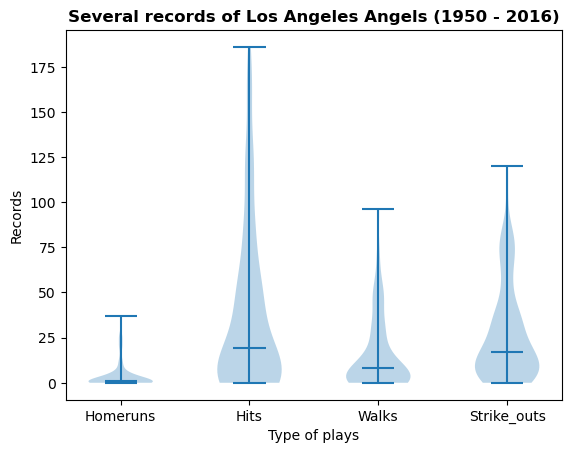

In [38]:
## Run the code.
graph_7()

In [39]:
## 2b.

#Define avg() function to calculate the average of the list.
def avg(List):
    result = round(sum(List)/len(List), 2)
    return result


#Define a function to sort the rows for a selected year.
def rows_for_year():
    
    #Make two options whether the user write the input directly or make a random input.
    ask = "If you want to enter the year directly, enter '1', or want to choose randomly, enter '2'."
    choice = int(input(ask))
    
    #According the user's choice, store the selected year in the variable, "year".
    if choice == 1:
        year = int(input("Enter a year."))
    elif choice == 2:
        year_list = get_unique_column_values(data, BD.year)
        year = random.choice(year_list)
    else:
        print("Error: Invalid value")
        choice = int(input(ask))
    
    #Select the matcing rows using 'get_matching_rows()' function and return it.
    matched_rows = get_matching_rows(data, BD.year, year)
    
    return year, matched_rows

In [40]:
#Define the function for plotting option 8.

# multi-plot with bar plots which shows the top 3 features 
# among hits, doubles, triples, home runs, walks, stolen bases, sac fly, and caught stealing for every position
# at a specific year, respectively.

def graph_8():
    #Call the selected year and the matching rows using 'rows_for_year()' function.
    year, interest = rows_for_year()
    
    #Get the unique values list of position column, and remove NULL.
    po = get_unique_column_values(interest, BD.position)
    po.remove("NULL")
    
    #Sort and save the matching rows in the empty 'L' list by position using for loop.
    L = []
    for i in po:
        L.append(get_matching_rows(interest, BD.position, i))
    
    #Save the matching rows saperately by positions.
    #Set empty lists by the type of plays.
    B2, SS, B3, OF, P, C, B1 = L[0], L[1], L[2], L[3], L[4], L[5], L[6]
    H, D, T, HR, SB, CS, SF = [], [], [], [], [], [], []
    Type = [H, D, T, HR, SB, CS, SF]

    t = ['H', 'doubles', 'triples', 'HR', 'stolenBases', 'caughtStealing', 'sacFly']
    
    
    #Create subplots to show several graphs in a plot.
    #Delete the last subplot because there are only seven plots.
    fig, ax = plt.subplots(2, 4, sharey = True, constrained_layout=True)
    fig.delaxes(ax[1, 3])
    
    #Draw seven barplots using the nested for-loop.
    #count, a, b is used for indexing the subplots.
    #For each list of position, append the values by the types of plays.
    count, a, b = 0, 0, 0
    for List in L:
        for row in List:
            H.append(row[BD.hits])
            D.append(row[BD.doubles])
            T.append(row[BD.triples])
            HR.append(row[BD.home_runs])
            SB.append(row[BD.stolen_bases])
            CS.append(row[BD.caught_stealing])
            SF.append(row[BD.sac_flies])
        #Calculate the average of each list using 'avg()' function and append the value to avg_List.
        avg_List = []
        for i in Type:
            avg_List.append(avg(i))
        
        #Rearrange the value for drawing a plot. (format: [type name of plays, average])
        l4plot = [[t[0], avg_List[0]], [t[1], avg_List[1]], [t[2], avg_List[2]], [t[3], avg_List[3]],
                  [t[4], avg_List[4]], [t[5], avg_List[5]], [t[6], avg_List[6]]]
        #Only the top 3 are selected.
        l4plot = sorted(l4plot, key=lambda x: x[1], reverse = True)[0:3]
        #Make the list into dataframe.
        df = pd.DataFrame(data = l4plot, columns = ["Type", "Avg_cnt"])
        #Draw the subplot as barplot which has type for x-axis and avg_cnt for y-axis.
        #Set the color of plot and title.
        ax[a, b].bar(df["Type"], df["Avg_cnt"], color = ["#02577a", "#89d6fb", "#d4f0fc"])
        ax[a, b].set_title(f"{po[count]}", fontweight = "bold")
        count += 1
        b += 1
        
        if b >= 4:
            a = 1
            b -= 4
    
    #Set the label and title for a whole plot.
    fig.supylabel("Average count")
    fig.supxlabel("Type of plays")
    plt.suptitle(f"The top 3 average counts of plays by position ({year})", size=12, fontweight = "bold")
    
    #Save the plot as PDF file.
    plt.savefig("Graph_8.pdf", dpi = 150, format = "pdf")
    
    plt.show()
    
    #Retrun the plot.
    return

If you want to enter the year directly, enter '1', or want to choose randomly, enter '2'. 2


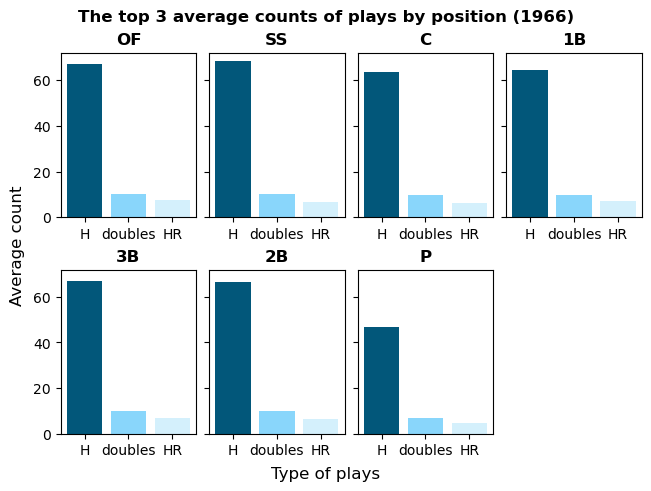

In [41]:
## Run the code.
graph_8()

Rows: 74750
Cols: 20
Congrats! You have the correct shape of data!



    1: Line graph of games played for one player over time
    2: Line graph of games played for one player over time, separated by team 
    3: Histogram of runs scored for all players in one year (no cutoff) 
    4: Histogram of runs scored for all players in one year (cutoff = 100) 
    5: Graph of team presence over time 
    6: Homeruns over time (percentiles)
    7: Violin boxplot for the number of home runs, hits, walks, and strike-out of a selected team. ( 1950 - 2016)
    8: multi-bar plots which shows the top 3 features among hits, doubles, triples, home runs, walks, stolen bases, sac fly, and caught stealing for every position, respectively.
    0: Exit 5


Result: the graph of team presence over time


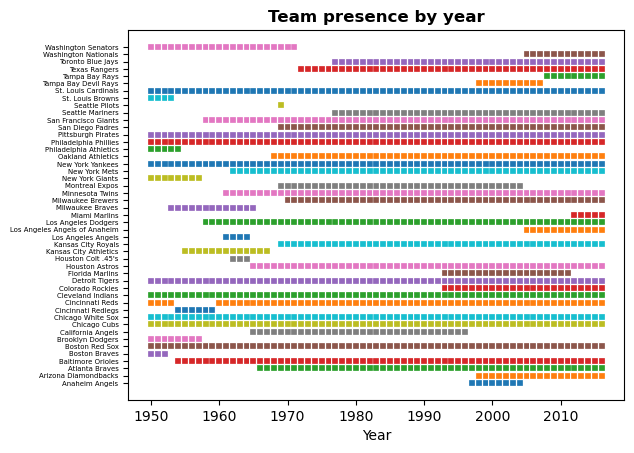


    1: Line graph of games played for one player over time
    2: Line graph of games played for one player over time, separated by team 
    3: Histogram of runs scored for all players in one year (no cutoff) 
    4: Histogram of runs scored for all players in one year (cutoff = 100) 
    5: Graph of team presence over time 
    6: Homeruns over time (percentiles)
    7: Violin boxplot for the number of home runs, hits, walks, and strike-out of a selected team. ( 1950 - 2016)
    8: multi-bar plots which shows the top 3 features among hits, doubles, triples, home runs, walks, stolen bases, sac fly, and caught stealing for every position, respectively.
    0: Exit 6


Result: the plot of home runs over time (percentiles)


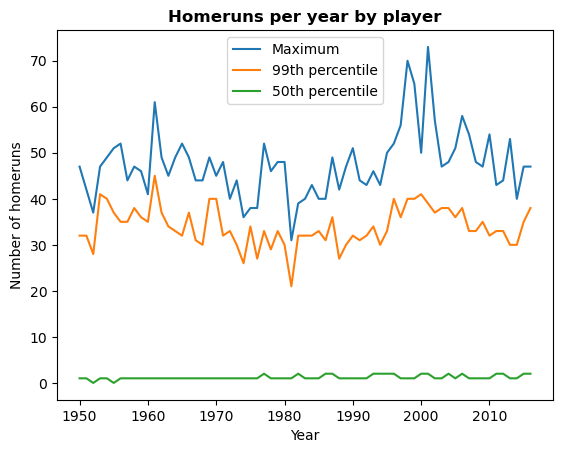


    1: Line graph of games played for one player over time
    2: Line graph of games played for one player over time, separated by team 
    3: Histogram of runs scored for all players in one year (no cutoff) 
    4: Histogram of runs scored for all players in one year (cutoff = 100) 
    5: Graph of team presence over time 
    6: Homeruns over time (percentiles)
    7: Violin boxplot for the number of home runs, hits, walks, and strike-out of a selected team. ( 1950 - 2016)
    8: multi-bar plots which shows the top 3 features among hits, doubles, triples, home runs, walks, stolen bases, sac fly, and caught stealing for every position, respectively.
    0: Exit 7


Result: the violin boxplot for the number of home runs, hits, walks, and strike-out of a selected team. (1950 - 2016)


If you want to enter the team name directly, enter '1', or want to choose randomly, enter '2': 2


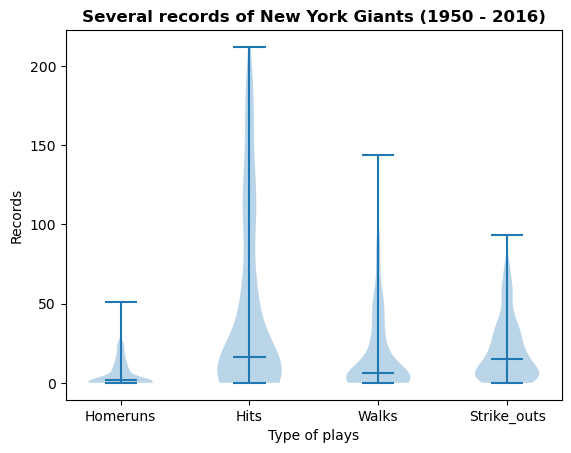


    1: Line graph of games played for one player over time
    2: Line graph of games played for one player over time, separated by team 
    3: Histogram of runs scored for all players in one year (no cutoff) 
    4: Histogram of runs scored for all players in one year (cutoff = 100) 
    5: Graph of team presence over time 
    6: Homeruns over time (percentiles)
    7: Violin boxplot for the number of home runs, hits, walks, and strike-out of a selected team. ( 1950 - 2016)
    8: multi-bar plots which shows the top 3 features among hits, doubles, triples, home runs, walks, stolen bases, sac fly, and caught stealing for every position, respectively.
    0: Exit 8


Result: the multi-bar plots that show the top 3 features among hits, doubles, triples, \home runs, walks, stolen bases, sac fly, and caught stealing for every position, respectively.


If you want to enter the year directly, enter '1', or want to choose randomly, enter '2'. 2


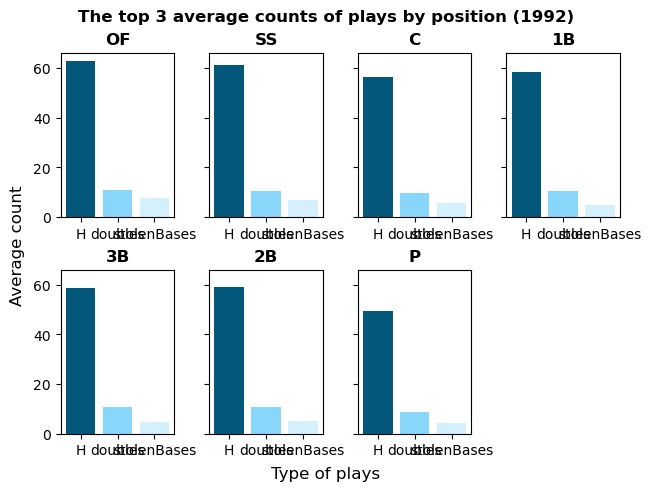


    1: Line graph of games played for one player over time
    2: Line graph of games played for one player over time, separated by team 
    3: Histogram of runs scored for all players in one year (no cutoff) 
    4: Histogram of runs scored for all players in one year (cutoff = 100) 
    5: Graph of team presence over time 
    6: Homeruns over time (percentiles)
    7: Violin boxplot for the number of home runs, hits, walks, and strike-out of a selected team. ( 1950 - 2016)
    8: multi-bar plots which shows the top 3 features among hits, doubles, triples, home runs, walks, stolen bases, sac fly, and caught stealing for every position, respectively.
    0: Exit 0


'Exit'

In [42]:
#Call the main() function.
main()